# Machine Learning Online Class - Exercise 4 Neural Network Learning

## Functions

In [27]:
function checkNNGradients(lambda)
%CHECKNNGRADIENTS Creates a small neural network to check the
%backpropagation gradients
%   CHECKNNGRADIENTS(lambda) Creates a small neural network to check the
%   backpropagation gradients, it will output the analytical gradients
%   produced by your backprop code and the numerical gradients (computed
%   using computeNumericalGradient). These two gradient computations should
%   result in very similar values.
%

if ~exist('lambda', 'var') || isempty(lambda)
    lambda = 0;
end

input_layer_size = 3;
hidden_layer_size = 5;
num_labels = 3;
m = 5;

% We generate some 'random' test data
Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size);
Theta2 = debugInitializeWeights(num_labels, hidden_layer_size);
% Reusing debugInitializeWeights to generate X
X  = debugInitializeWeights(m, input_layer_size - 1);
y  = 1 + mod(1:m, num_labels)';

% Unroll parameters
nn_params = [Theta1(:) ; Theta2(:)];

% Short hand for cost function
costFunc = @(p) nnCostFunction(p, input_layer_size, hidden_layer_size, ...
                               num_labels, X, y, lambda);

[cost, grad] = costFunc(nn_params);
numgrad = computeNumericalGradient(costFunc, nn_params);

% Visually examine the two gradient computations.  The two columns
% you get should be very similar. 
disp([numgrad grad]);
fprintf(['The above two columns you get should be very similar.\n' ...
         '(Left-Your Numerical Gradient, Right-Analytical Gradient)\n\n']);

% Evaluate the norm of the difference between two solutions.  
% If you have a correct implementation, and assuming you used EPSILON = 0.0001 
% in computeNumericalGradient.m, then diff below should be less than 1e-9
diff = norm(numgrad-grad)/norm(numgrad+grad);

fprintf(['If your backpropagation implementation is correct, then \n' ...
         'the relative difference will be small (less than 1e-9). \n' ...
         '\nRelative Difference: %g\n'], diff);

end

In [28]:
function numgrad = computeNumericalGradient(J, theta)
%COMPUTENUMERICALGRADIENT Computes the gradient using "finite differences"
%and gives us a numerical estimate of the gradient.
%   numgrad = COMPUTENUMERICALGRADIENT(J, theta) computes the numerical
%   gradient of the function J around theta. Calling y = J(theta) should
%   return the function value at theta.

% Notes: The following code implements numerical gradient checking, and 
%        returns the numerical gradient.It sets numgrad(i) to (a numerical 
%        approximation of) the partial derivative of J with respect to the 
%        i-th input argument, evaluated at theta. (i.e., numgrad(i) should 
%        be the (approximately) the partial derivative of J with respect 
%        to theta(i).)
%                

numgrad = zeros(size(theta));
perturb = zeros(size(theta));
e = 1e-4;
for p = 1:numel(theta)
    % Set perturbation vector
    perturb(p) = e;
    loss1 = J(theta - perturb);
    loss2 = J(theta + perturb);
    % Compute Numerical Gradient
    numgrad(p) = (loss2 - loss1) / (2*e);
    perturb(p) = 0;
end

end


In [29]:
function W = debugInitializeWeights(fan_out, fan_in)
%DEBUGINITIALIZEWEIGHTS Initialize the weights of a layer with fan_in
%incoming connections and fan_out outgoing connections using a fixed
%strategy, this will help you later in debugging
%   W = DEBUGINITIALIZEWEIGHTS(fan_in, fan_out) initializes the weights 
%   of a layer with fan_in incoming connections and fan_out outgoing 
%   connections using a fix set of values
%
%   Note that W should be set to a matrix of size(1 + fan_in, fan_out) as
%   the first row of W handles the "bias" terms
%

% Set W to zeros
W = zeros(fan_out, 1 + fan_in);

% Initialize W using "sin", this ensures that W is always of the same
% values and will be useful for debugging
W = reshape(sin(1:numel(W)), size(W)) / 10;

% =========================================================================

end


In [30]:
function [h, display_array] = displayData(X, example_width)
%DISPLAYDATA Display 2D data in a nice grid
%   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
%   stored in X in a nice grid. It returns the figure handle h and the 
%   displayed array if requested.

% Set example_width automatically if not passed in
if ~exist('example_width', 'var') || isempty(example_width) 
	example_width = round(sqrt(size(X, 2)));
end

% Gray Image
colormap(gray);

% Compute rows, cols
[m n] = size(X);
example_height = (n / example_width);

% Compute number of items to display
display_rows = floor(sqrt(m));
display_cols = ceil(m / display_rows);

% Between images padding
pad = 1;

% Setup blank display
display_array = - ones(pad + display_rows * (example_height + pad), ...
                       pad + display_cols * (example_width + pad));

% Copy each example into a patch on the display array
curr_ex = 1;
for j = 1:display_rows
    for i = 1:display_cols
        if curr_ex > m, 
            break; 
        end
        % Copy the patch

        % Get the max value of the patch
        max_val = max(abs(X(curr_ex, :)));
        display_array(pad + (j - 1) * (example_height + pad) + (1:example_height), ...
                      pad + (i - 1) * (example_width + pad) + (1:example_width)) = ...
                        reshape(X(curr_ex, :), example_height, example_width) / max_val;
        curr_ex = curr_ex + 1;
    end
    if curr_ex > m, 
        break; 
    end
end

% Display Image
h = imagesc(display_array, [-1 1]);

% Do not show axis
axis image off

drawnow;

end

In [34]:
function [X, fX, i] = fmincg(f, X, options, P1, P2, P3, P4, P5)
% Minimize a continuous differentialble multivariate function. Starting point
% is given by "X" (D by 1), and the function named in the string "f", must
% return a function value and a vector of partial derivatives. The Polack-
% Ribiere flavour of conjugate gradients is used to compute search directions,
% and a line search using quadratic and cubic polynomial approximations and the
% Wolfe-Powell stopping criteria is used together with the slope ratio method
% for guessing initial step sizes. Additionally a bunch of checks are made to
% make sure that exploration is taking place and that extrapolation will not
% be unboundedly large. The "length" gives the length of the run: if it is
% positive, it gives the maximum number of line searches, if negative its
% absolute gives the maximum allowed number of function evaluations. You can
% (optionally) give "length" a second component, which will indicate the
% reduction in function value to be expected in the first line-search (defaults
% to 1.0). The function returns when either its length is up, or if no further
% progress can be made (ie, we are at a minimum, or so close that due to
% numerical problems, we cannot get any closer). If the function terminates
% within a few iterations, it could be an indication that the function value
% and derivatives are not consistent (ie, there may be a bug in the
% implementation of your "f" function). The function returns the found
% solution "X", a vector of function values "fX" indicating the progress made
% and "i" the number of iterations (line searches or function evaluations,
% depending on the sign of "length") used.
%
% Usage: [X, fX, i] = fmincg(f, X, options, P1, P2, P3, P4, P5)
%
% See also: checkgrad 
%
% Copyright (C) 2001 and 2002 by Carl Edward Rasmussen. Date 2002-02-13
%
%
% (C) Copyright 1999, 2000 & 2001, Carl Edward Rasmussen
% 
% Permission is granted for anyone to copy, use, or modify these
% programs and accompanying documents for purposes of research or
% education, provided this copyright notice is retained, and note is
% made of any changes that have been made.
% 
% These programs and documents are distributed without any warranty,
% express or implied.  As the programs were written for research
% purposes only, they have not been tested to the degree that would be
% advisable in any important application.  All use of these programs is
% entirely at the user's own risk.
%
% [ml-class] Changes Made:
% 1) Function name and argument specifications
% 2) Output display
%

% Read options
if exist('options', 'var') && ~isempty(options) && isfield(options, 'MaxIter')
    length = options.MaxIter;
else
    length = 100;
end


RHO = 0.01;                            % a bunch of constants for line searches
SIG = 0.5;       % RHO and SIG are the constants in the Wolfe-Powell conditions
INT = 0.1;    % don't reevaluate within 0.1 of the limit of the current bracket
EXT = 3.0;                    % extrapolate maximum 3 times the current bracket
MAX = 20;                         % max 20 function evaluations per line search
RATIO = 100;                                      % maximum allowed slope ratio

argstr = ['feval(f, X'];                      % compose string used to call function
for i = 1:(nargin - 3)
  argstr = [argstr, ',P', int2str(i)];
end
argstr = [argstr, ')'];

if max(size(length)) == 2, red=length(2); length=length(1); else red=1; end
S=['Iteration '];

i = 0;                                            % zero the run length counter
ls_failed = 0;                             % no previous line search has failed
fX = [];
[f1 df1] = eval(argstr);                      % get function value and gradient
i = i + (length<0);                                            % count epochs?!
s = -df1;                                        % search direction is steepest
d1 = -s'*s;                                                 % this is the slope
z1 = red/(1-d1);                                  % initial step is red/(|s|+1)

while i < abs(length)                                      % while not finished
  i = i + (length>0);                                      % count iterations?!

  X0 = X; f0 = f1; df0 = df1;                   % make a copy of current values
  X = X + z1*s;                                             % begin line search
  [f2 df2] = eval(argstr);
  i = i + (length<0);                                          % count epochs?!
  d2 = df2'*s;
  f3 = f1; d3 = d1; z3 = -z1;             % initialize point 3 equal to point 1
  if length>0, M = MAX; else M = min(MAX, -length-i); end
  success = 0; limit = -1;                     % initialize quanteties
  while 1
    while ((f2 > f1+z1*RHO*d1) || (d2 > -SIG*d1)) && (M > 0) 
      limit = z1;                                         % tighten the bracket
      if f2 > f1
        z2 = z3 - (0.5*d3*z3*z3)/(d3*z3+f2-f3);                 % quadratic fit
      else
        A = 6*(f2-f3)/z3+3*(d2+d3);                                 % cubic fit
        B = 3*(f3-f2)-z3*(d3+2*d2);
        z2 = (sqrt(B*B-A*d2*z3*z3)-B)/A;       % numerical error possible - ok!
      end
      if isnan(z2) || isinf(z2)
        z2 = z3/2;                  % if we had a numerical problem then bisect
      end
      z2 = max(min(z2, INT*z3),(1-INT)*z3);  % don't accept too close to limits
      z1 = z1 + z2;                                           % update the step
      X = X + z2*s;
      [f2 df2] = eval(argstr);
      M = M - 1; i = i + (length<0);                           % count epochs?!
      d2 = df2'*s;
      z3 = z3-z2;                    % z3 is now relative to the location of z2
    end
    if f2 > f1+z1*RHO*d1 || d2 > -SIG*d1
      break;                                                % this is a failure
    elseif d2 > SIG*d1
      success = 1; break;                                             % success
    elseif M == 0
      break;                                                          % failure
    end
    A = 6*(f2-f3)/z3+3*(d2+d3);                      % make cubic extrapolation
    B = 3*(f3-f2)-z3*(d3+2*d2);
    z2 = -d2*z3*z3/(B+sqrt(B*B-A*d2*z3*z3));        % num. error possible - ok!
    if ~isreal(z2) || isnan(z2) || isinf(z2) || z2 < 0 % num prob or wrong sign?
      if limit < -0.5                               % if we have no upper limit
        z2 = z1 * (EXT-1);                 % the extrapolate the maximum amount
      else
        z2 = (limit-z1)/2;                                   % otherwise bisect
      end
    elseif (limit > -0.5) && (z2+z1 > limit)         % extraplation beyond max?
      z2 = (limit-z1)/2;                                               % bisect
    elseif (limit < -0.5) && (z2+z1 > z1*EXT)       % extrapolation beyond limit
      z2 = z1*(EXT-1.0);                           % set to extrapolation limit
    elseif z2 < -z3*INT
      z2 = -z3*INT;
    elseif (limit > -0.5) && (z2 < (limit-z1)*(1.0-INT))  % too close to limit?
      z2 = (limit-z1)*(1.0-INT);
    end
    f3 = f2; d3 = d2; z3 = -z2;                  % set point 3 equal to point 2
    z1 = z1 + z2; X = X + z2*s;                      % update current estimates
    [f2 df2] = eval(argstr);
    M = M - 1; i = i + (length<0);                             % count epochs?!
    d2 = df2'*s;
  end                                                      % end of line search

  if success                                         % if line search succeeded
    f1 = f2; fX = [fX' f1]';
    fprintf('%s %4i | Cost: %4.6e\r', S, i, f1);
    s = (df2'*df2-df1'*df2)/(df1'*df1)*s - df2;      % Polack-Ribiere direction
    tmp = df1; df1 = df2; df2 = tmp;                         % swap derivatives
    d2 = df1'*s;
    if d2 > 0                                      % new slope must be negative
      s = -df1;                              % otherwise use steepest direction
      d2 = -s'*s;    
    end
    z1 = z1 * min(RATIO, d1/(d2-realmin));          % slope ratio but max RATIO
    d1 = d2;
    ls_failed = 0;                              % this line search did not fail
  else
    X = X0; f1 = f0; df1 = df0;  % restore point from before failed line search
    if ls_failed || i > abs(length)          % line search failed twice in a row
      break;                             % or we ran out of time, so we give up
    end
    tmp = df1; df1 = df2; df2 = tmp;                         % swap derivatives
    s = -df1;                                                    % try steepest
    d1 = -s'*s;
    z1 = 1/(1-d1);                     
    ls_failed = 1;                                    % this line search failed
  end
  if exist('OCTAVE_VERSION')
    fflush(stdout);
  end
end
fprintf('\n');
end

In [35]:
function [J grad] = nnCostFunction(nn_params, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, ...
                                   X, y, lambda)
%NNCOSTFUNCTION Implements the neural network cost function for a two layer
%neural network which performs classification
%   [J grad] = NNCOSTFUNCTON(nn_params, hidden_layer_size, num_labels, ...
%   X, y, lambda) computes the cost and gradient of the neural network. The
%   parameters for the neural network are "unrolled" into the vector
%   nn_params and need to be converted back into the weight matrices. 
% 
%   The returned parameter grad should be a "unrolled" vector of the
%   partial derivatives of the neural network.
%

% Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
% for our 2 layer neural network
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));

% Setup some useful variables
m = size(X, 1);
         
% You need to return the following variables correctly 
J = 0;
Theta1_grad = zeros(size(Theta1));
Theta2_grad = zeros(size(Theta2));

% ====================== YOUR CODE HERE ======================
% Instructions: You should complete the code by working through the
%               following parts.
%
% Part 1: Feedforward the neural network and return the cost in the
%         variable J. After implementing Part 1, you can verify that your
%         cost function computation is correct by verifying the cost
%         computed in ex4.m
%
% Part 2: Implement the backpropagation algorithm to compute the gradients
%         Theta1_grad and Theta2_grad. You should return the partial derivatives of
%         the cost function with respect to Theta1 and Theta2 in Theta1_grad and
%         Theta2_grad, respectively. After implementing Part 2, you can check
%         that your implementation is correct by running checkNNGradients
%
%         Note: The vector y passed into the function is a vector of labels
%               containing values from 1..K. You need to map this vector into a 
%               binary vector of 1's and 0's to be used with the neural network
%               cost function.
%
%         Hint: We recommend implementing backpropagation using a for-loop
%               over the training examples if you are implementing it for the 
%               first time.
%
% Part 3: Implement regularization with the cost function and gradients.
%
%         Hint: You can implement this around the code for
%               backpropagation. That is, you can compute the gradients for
%               the regularization separately and then add them to Theta1_grad
%               and Theta2_grad from Part 2.
%


% Convert y to matrix
% XXX(SaveTheRbtz@): Curious how it can be vectorized (Should reread ex3 for
% logical arrays)
number_of_classes = length(unique(y));
Y = zeros(number_of_classes, m);
for i = 1:m
    Y(y(i), i) = 1;
endfor

% Do forward propagation
% Copy/Paste from ex3 predict.m
% FIXME(SaveTheRbtz@): Move to separate function
A1 = [ones(1, m); X'];
Z2=Theta1*A1;
A2 = [ones(1, m); sigmoid(Z2)];
Z3=Theta2*A2;
A3 = sigmoid(Z3);

% A3 here is our h0
h0 = A3;

% Compute cost function
% XXX(SaveTheRbtz@): Slightly modified version of ex2 costFunction
J = (1/m)*sum(sum(-Y.*log(h0) - (1-Y).*log(1-h0)));

% Add some regularization
% XXX(SaveTheRbtz@): Also borrowed from ex2 costFunctionReg
penalize = sum(sum(Theta1(:, 2:end) .^ 2)) + sum(sum(Theta2(:, 2:end) .^ 2));
J = J + (lambda/(2*m)) * penalize;

% Implement backpropagation
delta_3 = A3 - Y;
delta_2 = (Theta2'*delta_3)(2:end, :) .* sigmoidGradient(Z2);

% Calculate gradients
Theta1_unreg_grad = (delta_2 * A1')/m;
Theta2_unreg_grad = (delta_3 * A2')/m;

% Regularize
Theta1_grad = Theta1_unreg_grad + (lambda/m) * Theta1;
Theta2_grad = Theta2_unreg_grad + (lambda/m) * Theta2;

Theta1_grad(:, 1) = Theta1_unreg_grad(:, 1);
Theta2_grad(:, 1) = Theta2_unreg_grad(:, 1);





% -------------------------------------------------------------

% =========================================================================

% Unroll gradients
grad = [Theta1_grad(:) ; Theta2_grad(:)];


end


In [36]:
function p = predict(Theta1, Theta2, X)
%PREDICT Predict the label of an input given a trained neural network
%   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
%   trained weights of a neural network (Theta1, Theta2)

% Useful values
m = size(X, 1);
num_labels = size(Theta2, 1);

% You need to return the following variables correctly 
p = zeros(size(X, 1), 1);

h1 = sigmoid([ones(m, 1) X] * Theta1');
h2 = sigmoid([ones(m, 1) h1] * Theta2');
[dummy, p] = max(h2, [], 2);

% =========================================================================


end


In [37]:
function W = randInitializeWeights(L_in, L_out)
%RANDINITIALIZEWEIGHTS Randomly initialize the weights of a layer with L_in
%incoming connections and L_out outgoing connections
%   W = RANDINITIALIZEWEIGHTS(L_in, L_out) randomly initializes the weights 
%   of a layer with L_in incoming connections and L_out outgoing 
%   connections. 
%
%   Note that W should be set to a matrix of size(L_out, 1 + L_in) as
%   the first column of W handles the "bias" terms
%

% You need to return the following variables correctly 
W = zeros(L_out, 1 + L_in);

% ====================== YOUR CODE HERE ======================
% Instructions: Initialize W randomly so that we break the symmetry while
%               training the neural network.
%
% Note: The first column of W corresponds to the parameters for the bias unit
%

% Randomly initialize the weights to small values
epsilon_init = 0.12;
W = rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init;


% =========================================================================

end


In [38]:
function g = sigmoid(z)
%SIGMOID Compute sigmoid functoon
%   J = SIGMOID(z) computes the sigmoid of z.

g = 1.0 ./ (1.0 + exp(-z));
end

In [39]:
function g = sigmoidGradient(z)
%SIGMOIDGRADIENT returns the gradient of the sigmoid function
%evaluated at z
%   g = SIGMOIDGRADIENT(z) computes the gradient of the sigmoid function
%   evaluated at z. This should work regardless if z is a matrix or a
%   vector. In particular, if z is a vector or matrix, you should return
%   the gradient for each element.

g = zeros(size(z));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the gradient of the sigmoid function evaluated at
%               each value of z (z can be a matrix, vector or scalar).



g = sigmoid(z) .* (1 - sigmoid(z));










% =============================================================




end

## Initialization

In [40]:
clear ; close all; clc

%% Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

## Part 1: Loading and Visualizing Data

Loading and Visualizing Data ...


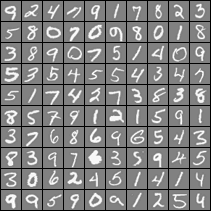

In [41]:
% Load Training Data
fprintf('Loading and Visualizing Data ...\n')
load('../../data/digits_neural_networks.mat');
m = size(X, 1);

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

displayData(X(sel, :));

## Part 2 : Loading Parameters

In [42]:
% In this part of the exercise, we load some pre-initialized 
% neural network parameters.

fprintf('\nLoading Saved Neural Network Parameters ...\n')

% Load the weights into variables Theta1 and Theta2
load('../../data/digits_neural_networks_weights.mat');

% Unroll parameters 
nn_params = [Theta1(:) ; Theta2(:)];


Loading Saved Neural Network Parameters ...


## Part 3 : Compute Cost (Feedforward)

In [43]:
%% ================ Part 3: Compute Cost (Feedforward) ================
%  To the neural network, you should first start by implementing the
%  feedforward part of the neural network that returns the cost only. You
%  should complete the code in nnCostFunction.m to return cost. After
%  implementing the feedforward to compute the cost, you can verify that
%  your implementation is correct by verifying that you get the same cost
%  as us for the fixed debugging parameters.
%
%  We suggest implementing the feedforward cost *without* regularization
%  first so that it will be easier for you to debug. Later, in part 4, you
%  will get to implement the regularized cost.
%
fprintf('\nFeedforward Using Neural Network ...\n')

% Weight regularization parameter (we set this to 0 here).
lambda = 0;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from digits_neural_networks_weights): %f '...
         '\n(this value should be about 0.287629)\n'], J);


Feedforward Using Neural Network ...
Cost at parameters (loaded from digits_neural_networks_weights): 0.287629 
(this value should be about 0.287629)


## Part 4 : Implement Regularization

In [44]:
%% =============== Part 4: Implement Regularization ===============
%  Once your cost function implementation is correct, you should now
%  continue to implement the regularization with the cost.
%

fprintf('\nChecking Cost Function (w/ Regularization) ... \n')

% Weight regularization parameter (we set this to 1 here).
lambda = 1;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from digits_neural_networks_weights): %f '...
         '\n(this value should be about 0.383770)\n'], J);


Checking Cost Function (w/ Regularization) ... 
Cost at parameters (loaded from digits_neural_networks_weights): 0.383770 
(this value should be about 0.383770)


## Part 5 : Sigmoid Gradient  

In [45]:
%% ================ Part 5: Sigmoid Gradient  ================
%  Before you start implementing the neural network, you will first
%  implement the gradient for the sigmoid function. You should complete the
%  code in the sigmoidGradient.m file.
%

fprintf('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient([-1 -0.5 0 0.5 1]);
fprintf('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
fprintf('%f ', g);
fprintf('\n\n');


Evaluating sigmoid gradient...
Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
0.196612 0.235004 0.250000 0.235004 0.196612 


  0.196612 0.235004 0.250000 0.235004 0.196612 


## Part 6: Initializing Pameters

In [46]:
%% ================ Part 6: Initializing Pameters ================
%  In this part of the exercise, you will be starting to implment a two
%  layer neural network that classifies digits. You will start by
%  implementing a function to initialize the weights of the neural network
%  (randInitializeWeights.m)

fprintf('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

% Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];


Initializing Neural Network Parameters ...


## Part 7: Implement Backpropagation 

In [47]:
%% =============== Part 7: Implement Backpropagation ===============
%  Once your cost matches up with ours, you should proceed to implement the
%  backpropagation algorithm for the neural network. You should add to the
%  code you've written in nnCostFunction.m to return the partial
%  derivatives of the parameters.
%
fprintf('\nChecking Backpropagation... \n');

%  Check gradients by running checkNNGradients
checkNNGradients;


Checking Backpropagation... 
  -9.2783e-03  -9.2783e-03
   8.8991e-03   8.8991e-03
  -8.3601e-03  -8.3601e-03
   7.6281e-03   7.6281e-03
  -6.7480e-03  -6.7480e-03
  -3.0498e-06  -3.0498e-06
   1.4287e-05   1.4287e-05
  -2.5938e-05  -2.5938e-05
   3.6988e-05   3.6988e-05
  -4.6876e-05  -4.6876e-05
  -1.7506e-04  -1.7506e-04
   2.3315e-04   2.3315e-04
  -2.8747e-04  -2.8747e-04
   3.3532e-04   3.3532e-04
  -3.7622e-04  -3.7622e-04
  -9.6266e-05  -9.6266e-05
   1.1798e-04   1.1798e-04
  -1.3715e-04  -1.3715e-04
   1.5325e-04   1.5325e-04
  -1.6656e-04  -1.6656e-04
   3.1454e-01   3.1454e-01
   1.1106e-01   1.1106e-01
   9.7401e-02   9.7401e-02
   1.6409e-01   1.6409e-01
   5.7574e-02   5.7574e-02
   5.0458e-02   5.0458e-02
   1.6457e-01   1.6457e-01
   5.7787e-02   5.7787e-02
   5.0753e-02   5.0753e-02
   1.5834e-01   1.5834e-01
   5.5924e-02   5.5924e-02
   4.9162e-02   4.9162e-02
   1.5113e-01   1.5113e-01
   5.3697e-02   5.3697e-02
   4.7146e-02   4.7146e-02
   1.4957e-01   1.4957e-0

## Part 8: Implement Regularization

In [48]:
%% =============== Part 8: Implement Regularization ===============
%  Once your backpropagation implementation is correct, you should now
%  continue to implement the regularization with the cost and gradient.
%

fprintf('\nChecking Backpropagation (w/ Regularization) ... \n')

%  Check gradients by running checkNNGradients
lambda = 3;
checkNNGradients(lambda);

% Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params, input_layer_size, ...
                          hidden_layer_size, num_labels, X, y, lambda);

fprintf(['\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' ...
         '\n(for lambda = 3, this value should be about 0.576051)\n\n'], lambda, debug_J);


Checking Backpropagation (w/ Regularization) ... 
  -9.2783e-03  -9.2783e-03
   8.8991e-03   8.8991e-03
  -8.3601e-03  -8.3601e-03
   7.6281e-03   7.6281e-03
  -6.7480e-03  -6.7480e-03
  -1.6768e-02  -1.6768e-02
   3.9433e-02   3.9433e-02
   5.9336e-02   5.9336e-02
   2.4764e-02   2.4764e-02
  -3.2688e-02  -3.2688e-02
  -6.0174e-02  -6.0174e-02
  -3.1961e-02  -3.1961e-02
   2.4923e-02   2.4923e-02
   5.9772e-02   5.9772e-02
   3.8641e-02   3.8641e-02
  -1.7370e-02  -1.7370e-02
  -5.7566e-02  -5.7566e-02
  -4.5196e-02  -4.5196e-02
   9.1459e-03   9.1459e-03
   5.4610e-02   5.4610e-02
   3.1454e-01   3.1454e-01
   1.1106e-01   1.1106e-01
   9.7401e-02   9.7401e-02
   1.1868e-01   1.1868e-01
   3.8193e-05   3.8193e-05
   3.3693e-02   3.3693e-02
   2.0399e-01   2.0399e-01
   1.1715e-01   1.1715e-01
   7.5480e-02   7.5480e-02
   1.2570e-01   1.2570e-01
  -4.0759e-03  -4.0759e-03
   1.6968e-02   1.6968e-02
   1.7634e-01   1.7634e-01
   1.1313e-01   1.1313e-01
   8.6163e-02   8.6163e-02
   1

## Part 8: Training NN

In [49]:
%% =================== Part 8: Training NN ===================
%  You have now implemented all the code necessary to train a neural 
%  network. To train your neural network, we will now use "fmincg", which
%  is a function which works similarly to "fminunc". Recall that these
%  advanced optimizers are able to train our cost functions efficiently as
%  long as we provide them with the gradient computations.
%
fprintf('\nTraining Neural Network... \n')

%  After you have completed the assignment, change the MaxIter to a larger
%  value to see how more training helps.
options = optimset('MaxIter', 50);

%  You should also try different values of lambda
lambda = 1;

% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);

% Now, costFunction is a function that takes in only one argument (the
% neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));


Training Neural Network... 
Iteration    50 | Cost: 4.572720e-01


## Part 9 : Visualize Weights


Visualizing Neural Network... 


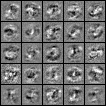

In [50]:
%% ================= Part 9: Visualize Weights =================
%  You can now "visualize" what the neural network is learning by 
%  displaying the hidden units to see what features they are capturing in 
%  the data.

fprintf('\nVisualizing Neural Network... \n')

displayData(Theta1(:, 2:end));

## Part 10: Implement Predict

In [51]:
%% ================= Part 10: Implement Predict =================
%  After training the neural network, we would like to use it to predict
%  the labels. You will now implement the "predict" function to use the
%  neural network to predict the labels of the training set. This lets
%  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 95.820000
